In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
sns.set_style('whitegrid')

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<h1><center>About Data Set TITANIC</center></h1>


# $ Data Details : $
|Variable|	Definition|	Key|
|---|---|---|
 |survival|	Survival	|0 = No, 1 = Yes|
 |pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
 |sex|	Sex	|
 |Age|	Age in years|	
 |sibsp|	# of siblings / spouses aboard the Titanic|	
 |parch|	# of parents / children aboard the Titanic|	
 |ticket|	Ticket number	|
 |fare|	Passenger fare|	
 |cabin|	Cabin number	|
 |embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|


### Variable Notes
- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
- 
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- 
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- 
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:
titanic.shape

(891, 15)

In [7]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
titanic.isnull().sum()[titanic.isnull().sum()>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

### Fill the Null Values 

titanic.isnull().sum()[titanic.isnull().sum()>0]/titanic.shape[0]*100

In [11]:
titanic.age.fillna(titanic.age.mean(),inplace=True)
titanic.embarked.fillna(titanic.embarked.mode()[0],inplace=True)
titanic.embark_town.fillna(titanic.embark_town.mode()[0],inplace=True)

In [12]:
titanic.drop(columns="deck",inplace=True)

In [13]:
titanic.isnull().sum()[titanic.isnull().sum()>0]

Series([], dtype: int64)

### EDA (PLOTS)

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


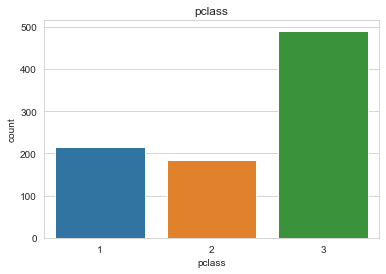

In [19]:
sns.countplot(x="pclass",data=titanic).set(title='pclass')
plt.show()

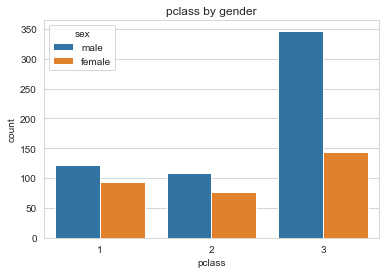

In [21]:
sns.countplot(x="pclass",data=titanic,hue="sex").set(title='pclass by gender')
plt.show()

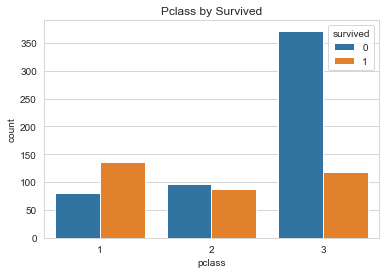

In [22]:
sns.countplot(x="pclass",data=titanic,hue="survived").set(title='Pclass by Survived')
plt.show()

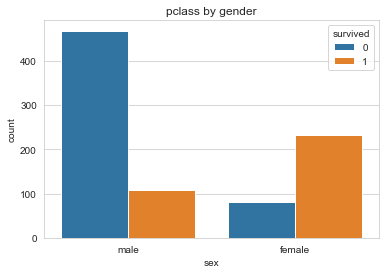

In [34]:
sns.countplot(x="sex",data=titanic,hue="survived").set(title='pclass by gender')
plt.show()

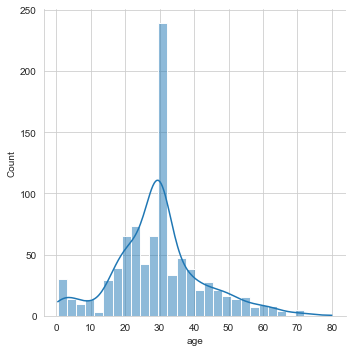

In [29]:
sns.displot(x="age",data=titanic,kde=True)
plt.show()

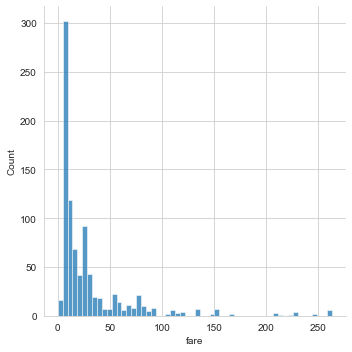

In [36]:
sns.displot(x="fare",data=titanic[titanic.fare<300])
plt.show()

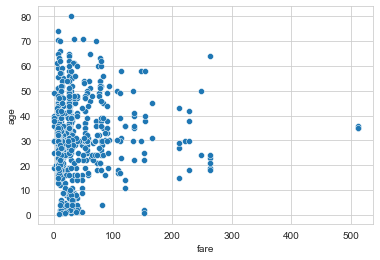

In [32]:
sns.scatterplot(x="fare",y="age",data=titanic)
plt.show()

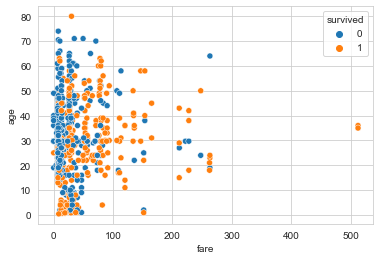

In [33]:
sns.scatterplot(x="fare",y="age",data=titanic,hue="survived")
plt.show()

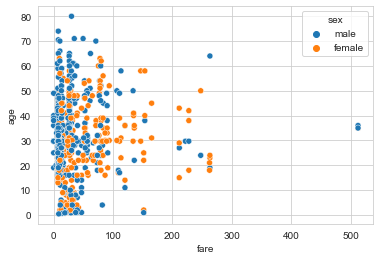

In [35]:
sns.scatterplot(x="fare",y="age",data=titanic,hue="sex")
plt.show()

### Encoding

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

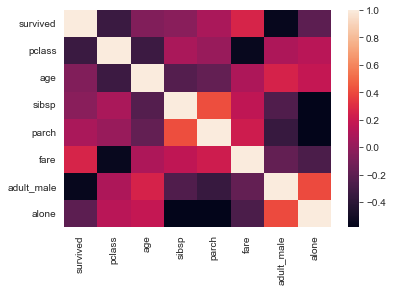

In [15]:
sns.heatmap(titanic.corr())

<AxesSubplot:>

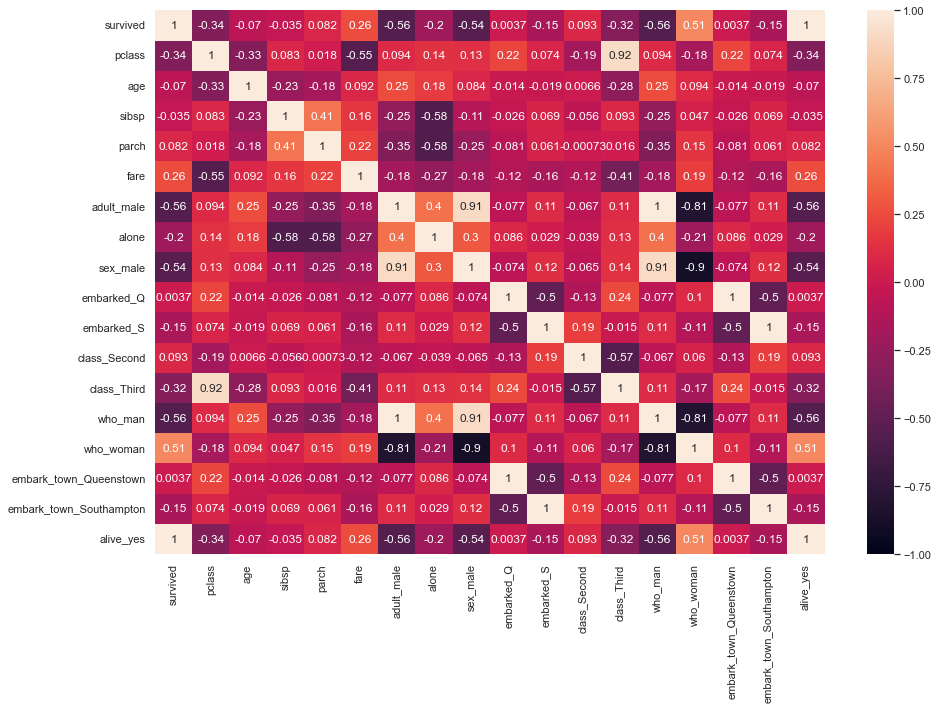

In [16]:
sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(pd.get_dummies(titanic,drop_first=True).corr(),annot=True,vmin=-1)

In [17]:
titanic.alive.unique()

array(['no', 'yes'], dtype=object)

In [18]:
copy_col=["alive","embark_town","alone","adult_male","class","who"]

In [19]:
titanic.drop(columns=copy_col,inplace=True)

In [20]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


<AxesSubplot:>

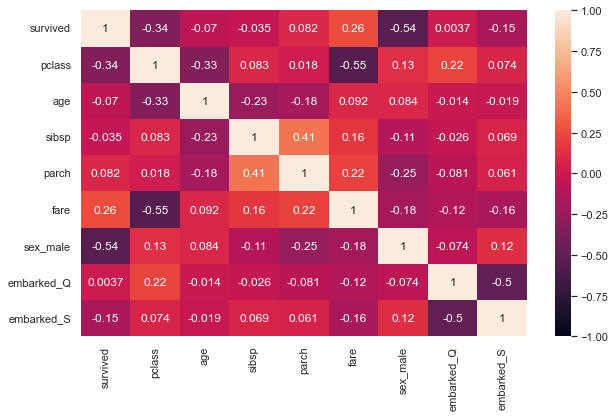

In [21]:
sns.set(rc={"figure.figsize":(10,6)})
sns.heatmap(pd.get_dummies(titanic,drop_first=True).corr(),annot=True,vmin=-1)

<AxesSubplot:>

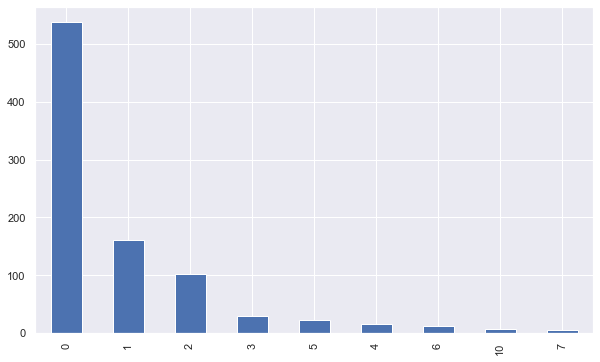

In [22]:
(titanic.sibsp+titanic.parch).value_counts().plot(kind="bar")

In [23]:
titanic["family"]=titanic.sibsp+titanic.parch

In [24]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1


In [25]:
titanic.drop(columns=["sibsp","parch"],inplace=True)

In [26]:
titanic.head(2)

,survived,pclass,sex,age,fare,embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1


In [27]:
titanic=pd.get_dummies(titanic,drop_first=True)

In [28]:
titanic.head(2)

,survived,pclass,age,fare,family,sex_male,embarked_Q,embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0


# Machine Learning

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
x,x_test,y,y_test=train_test_split(titanic.drop(columns="survived"),
                                   titanic.survived,
                                  random_state=42,
                                  test_size=.1)

In [31]:
print(f"x shape is {x.shape} \n y shape is {y.shape}")
print(f"xtest shape is {x_test.shape} \n ytest shape is {y_test.shape}")

x shape is (801, 7) 
 y shape is (801,)
xtest shape is (90, 7) 
 ytest shape is (90,)


In [32]:
lr=LogisticRegression()


In [33]:
lr.fit(x,y)

LogisticRegression()

In [41]:
x_test.head()

,pclass,age,fare,family,sex_male,embarked_Q,embarked_S
709,3,29.699118,15.2458,2,1,0,0
439,2,31.000000,10.5000,0,1,0,1
840,3,20.000000,7.9250,0,1,0,1
720,2,6.000000,33.0000,1,0,0,1
39,3,14.000000,11.2417,1,0,0,0


In [34]:
y_hat=lr.predict(x_test)

In [42]:
y_hat

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [44]:
print(y_test)

709    1
439    0
840    0
720    1
39     1
      ..
493    0
215    1
309    1
822    0
250    0
Name: survived, Length: 90, dtype: int64


In [35]:
print(f"Your model accuracy is {accuracy_score(y_test,y_hat)*100}")

Your model accuracy is 84.44444444444444


In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print(f"Your model accuracy is \n{confusion_matrix(y_test,y_hat)}")

Your model accuracy is 
[[46  8]
 [ 6 30]]


In [39]:
print(f"Your model accuracy is \n{classification_report(y_test,y_hat)}")

Your model accuracy is 
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90

